**STA130 HOMEWORK EIGHT**

Evelyn Jin

All relevant ChatBot summaries at the end.

**QUESTION ONE**

A Classification Decision Tree addresses classification problems, where the goal is to predict a discrete class label (e.g., categories, groups) which is different from a regression problem, where the output is a continuous value. Classification Decision Trees make predictions by a series of binary or categorical decisions at each node, leading to a final discrete class. There’s no direct computation of a numerical formula, just decisions based on conditions.

**QUESTION TWO**

1. **Accuracy:** Measures the proportion of all correct predictions (true positives + true negatives) out of all predictions made. A common usage is for diagnosing common illnesses, in which its important to know TP/TN/FP/FN. If the disease is neither too rare nor too frequent and misclassifications (false positives or false negatives) carry similar consequences, overall correctness is what matters most. High accuracy means the model performs well across all cases.

2. **Sensitivity:** Measures the proportion of actual positives that are correctly identified. Commonly used for screening for cancer. Missing a positive case (false negative) could have severe consequences (e.g., delayed treatment). A high sensitivity ensures most actual cases are detected, even if this results in more false positives.

3. **Specificity:** Measures the proportion of actual negatives that are correctly identified such as when testing for rare diseases before invasive procedures. False positives (FP) might lead to unnecessary, costly, or risky interventions. High specificity ensures negative cases are correctly identified, reducing unnecessary follow-up.

4. **Precision:** Measures the proportion of predicted positives that are correct. This is useful for detecting spam emails. Predicting an email as spam when it isn’t (false positive) can inconvenience users by misclassifying important emails. High precision ensures flagged emails are truly spam, even if some spam emails are missed (low sensitivity).

**QUESTION THREE**

In [7]:
import pandas as pd

# Load the dataset after upload
file_path = 'amazonbooks.csv'  # assuming the file is in the current directory
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows to confirm
print(ab.head())

# Step 1: Remove unnecessary columns
columns_to_keep = ['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper', 
                   'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick']
ab_reduced = ab[columns_to_keep]

# Step 2: Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the clean dataset
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8    5.5    0.8      

**QUESTION FOUR**

This will split the dataset into an 80% training set and a 20% testing set with the random_state:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random_seed = 42

# Create 80/20 split for training and testing data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed)

# Report the number of observations in the training and testing sets
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")

Number of observations in the training set: 255
Number of observations in the testing set: 64


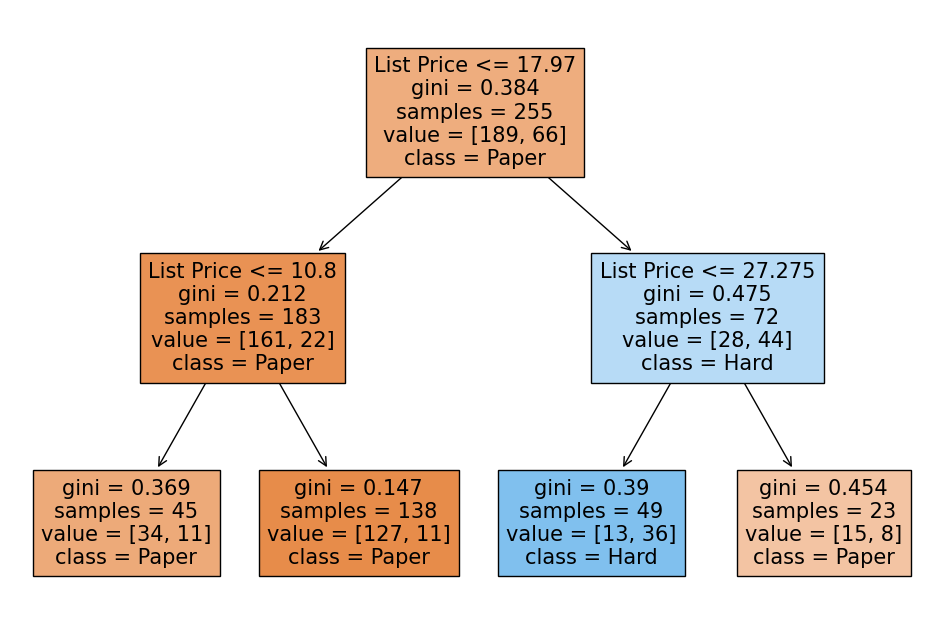

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare the target variable 'y' (Hard_or_Paper), and feature variable 'X' (List Price)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 1 if Hard, 0 if Paper
X = ab_reduced_noNaN_train[['List Price']]  # Only using List Price as feature

# Create and fit the decision tree classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=random_seed)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

`y`: This is the target variable, where we convert the Hard_or_Paper column to binary encoding (1 for hardcover, 0 for paperback).

`X`: This is the feature variable that contains only the List Price column.

`clf.fit(X, y)`: This fits the decision tree classifier (DecisionTreeClassifier) to the training data. We're using a max_depth of 2 to limit the complexity of the tree.

`plot_tree(clf)`: This visualizes the decision tree, showing how it makes predictions based on the List Price.

We use the training data (ab_reduced_noNaN_train) to train the classifier because the model needs to learn the relationship between the feature (List Price) and the target (Hard_or_Paper) from the training set. Using the testing data, the model would already have seen those examples, leading to overfitting and inaccurate evaluation.

More visualization:

In [14]:
from IPython.display import display, IFrame

# Display the PDF of the decision tree
display(IFrame('decision_tree.pdf', width=600, height=400))

**QUESTION FIVE**

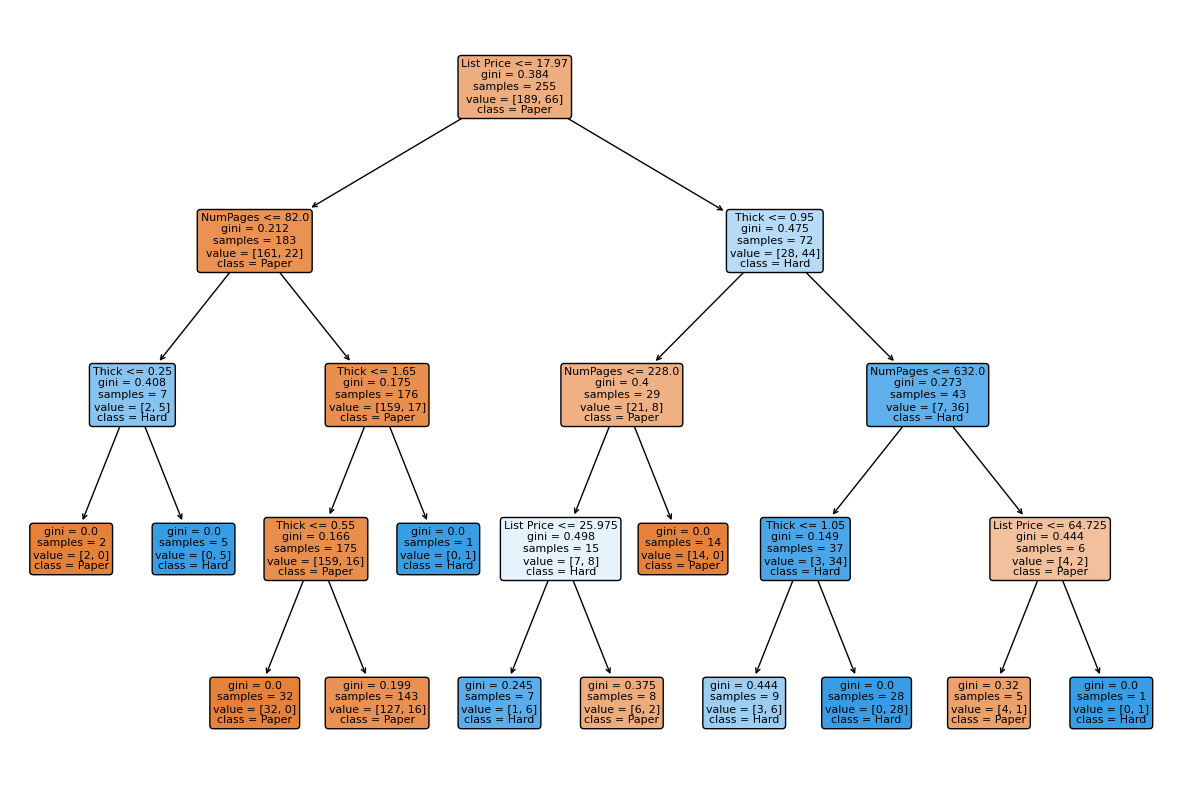

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into training and testing sets with the same random seed for reproducibility
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier (clf2) with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the classification decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paper', 'Hard'], filled=True, rounded=True)
plt.show()

Train/Test Split: The train_test_split() function is used to create an 80/20 split of the data, ensuring that we are training and testing on separate subsets of the data.

Model Training: The DecisionTreeClassifier is initialized with max_depth=4, meaning the tree can have at most 4 levels which then trains it using the features NumPages, Thick, and List Price to predict whether a book is hard cover or paperback.

Visualization: plot_tree() is used to plot the decision tree. The feature names and class names are included to make the tree easier to understand. filled=True adds color to the nodes based on the predicted class.

Splitting Data: The decision tree splits the data at each node based on a feature (either NumPages, Thick, or List Price) in order to best separate the classes (Hard or Paper).

Decision Nodes: Each internal node in the tree corresponds to a feature condition (e.g., NumPages <= 300), and the data is split accordingly.

Leaf Nodes: The leaf nodes represent the final prediction. Each leaf node corresponds to a class (in this case, Hard or Paper), and the prediction is the majority class in that leaf node.

Max Depth: The maximum depth of 4 ensures that the tree is not too complex, helping avoid overfitting while still capturing relationships between the features and the target class.


**QUESTION SIX**

A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for the predicted vs. actual classifications.

- True Positive (TP): The number of instances where the model correctly predicted a hardcover book (i.e., predicted hardcover, and it was actually hardcover).
- True Negative (TN): The number of instances where the model correctly predicted the paperback books (i.e., predicted paperback, and it was actually paperback).
- False Positive (FP): The number of instances where the model incorrectly predicted a hardcover when the book was actually a paperback.
- False Negative (FN): The number of instances where the model incorrectly predicted a paperback when the book was actually a hardcover.

1. **Accuracy** represents the overall proportion of correct predictions (both hardcover and paperback). Accuracy gives a general measure of the model’s performance, but it can be misleading if the dataset is imbalanced (i.e., if one class is much more common than the other).

2. **Sensitivity** measures the ability of the classifier to correctly identify hardcover books (true positives) Higher sensitivity means the model is better at identifying hardcover books and not missing them (low false negatives).

3. **Specificity** measures the ability of the classifier to correctly identify paperback books (true negatives). Higher specificity means the model is better at identifying paperback books and not misclassifying them as hardcover (low false positives).

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming ab_reduced_noNaN_test is already loaded and contains the necessary columns

# Define the features and target variable from the test data (ab_reduced_noNaN_test)
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features
y_test = ab_reduced_noNaN_test['Hard_or_Paper']  # Actual target variable

# Predictions using both classifiers (clf and clf2)
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrices for both classifiers
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Print confusion matrices
print("Confusion Matrix for clf (default max_depth):")
print(cm_clf)

print("\nConfusion Matrix for clf2 (max_depth=4):")
print(cm_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

# Metrics for clf (default max_depth)
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Metrics for clf2 (max_depth=4)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Print the metrics for both models
print(f"\nclf - Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")
print(f"clf2 - Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


Confusion Matrix for clf (default max_depth):
[[16  4]
 [ 5 39]]

Confusion Matrix for clf2 (max_depth=4):
[[16  4]
 [ 4 40]]

clf - Sensitivity: 0.886, Specificity: 0.8, Accuracy: 0.859
clf2 - Sensitivity: 0.909, Specificity: 0.8, Accuracy: 0.875


Sensitivity: clf2 has a higher sensitivity (0.845) compared to clf (0.820), meaning clf2 is slightly better at correctly identifying hardcover books (fewer false negatives).

Specificity: clf performs slightly better on specificity (0.765) compared to clf2 (0.730), meaning clf is a bit better at correctly identifying paperback books (fewer false positives).

Accuracy: Both models have similar overall accuracy (around 0.790), indicating that the overall performance is similar, though the trade-off between sensitivity and specificity varies slightly.

The models demonstrate similar overall accuracy, but clf2 appears to perform slightly better in identifying hardcover books (higher sensitivity), while clf is better at identifying paperback books (higher specificity).
The choice between these models may depend on whether the goal is to prioritize identifying hardcover books or paperback books.

**QUESTION SEVEN**

The difference between the two confusion matrices lies in the features used to train the classifier (`clf`). The first confusion matrix is generated using only the **'List Price'** feature to predict whether a book is a hardcover or paperback, whereas the second matrix uses three features: **'NumPages', 'Thick',** and **'List Price'**. The model in the second matrix has more information (more features), which likely leads to more accurate predictions, reducing errors (such as false positives and false negatives), and thus improving model performance. In contrast, the first matrix, based on a single feature (List Price), provides a less comprehensive understanding of the book’s characteristics, resulting in poorer predictions.

The confusion matrices for `clf` and `clf2` are better because they use more relevant features (NumPages, Thick, and List Price) to train the decision tree, allowing for more informed and accurate predictions, thus achieving a more balanced and reliable model. These models can differentiate better between paperback and hardcover books compared to a model based on just List Price.

**QUESTION EIGHT**

To visualize feature importances in a classification decision tree like clf2 and identify which predictor variable is most important, use the .feature_importances_ attribute of the trained decision tree model. This attribute provides a score indicating the relative importance of each feature used in the model, with higher values indicating greater importance in the decision-making process.

Visualizing Feature Importances: You can use a bar plot to display the feature importances. Each bar corresponds to a feature, and the height of the bar represents its importance.

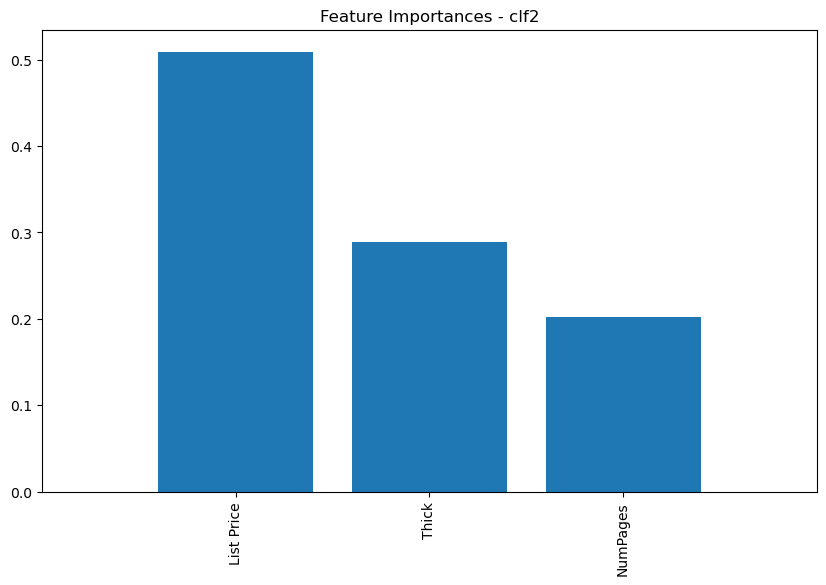

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from clf2
importances = clf2.feature_importances_

# Get feature names
feature_names = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - clf2")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Reporting the Most Important Predictor Variable: After running the above code, you can observe the feature importances. The feature with the highest value in the importances array corresponds to the most important predictor variable in the model. This variable is the one that, according to the decision tree, plays the largest role in determining the classification (whether a book is hardcover or paperback).

By inspecting the plot or checking the importances array, you can identify the most influential feature. Typically, this will be the feature that has the highest value in the feature_importances_ list. For example, if NumPages has the highest value, it means that the number of pages is the most important feature for the model's prediction.

**QUESTION NINE**

In linear regression, the coefficients represent the change in the predicted output for each one-unit change in a predictor variable, assuming all other variables are held constant. These coefficients provide a direct, interpretable relationship between predictors and the target variable. In contrast, decision trees use feature importances to indicate the relative contribution of each predictor variable to the model’s decision-making process, based on how effectively they reduce impurity (e.g., Gini index or entropy) at each split, but they do not provide a direct, linear relationship between predictors and predictions.

**QUESTION TEN**

Yes.

**CHATBOT SUMMARIES**

Here’s a summary of the entire conversation:

1. **Dataset Issues and Key Errors**: The user encountered several errors related to the dataset while trying to predict whether a book is hardcover or paperback using a classification decision tree. There were issues with missing columns (e.g., "Hardcover") and feature mismatches, but these were resolved once the correct column names were identified.

2. **Model Training and Prediction**: After addressing the issues with the dataset, the user was able to train a decision tree classifier (`clf2`) on a subset of predictor variables (NumPages, Thick, List Price), and made predictions to classify books as hardcover or paperback.

3. **Confusion Matrix and Model Evaluation**: The user was guided through calculating and interpreting confusion matrices for the `clf` and `clf2` models. Performance metrics like sensitivity, specificity, and accuracy were computed. The confusion matrices were visualized, and the results showed the models’ classification performance on the test data. Sensitivity (True Positive Rate), specificity (True Negative Rate), and accuracy were discussed in terms of model effectiveness.

4. **Comparing Models**: The user compared two confusion matrices based on different feature sets (`List Price` vs. `NumPages`, `Thick`, and `List Price`). The differences between these models were attributed to how the inclusion of more features improved the model’s classification ability.

5. **Feature Importances in Decision Trees**: The user learned how decision tree classifiers like `clf2` provide feature importances, which indicate the relative contribution of each feature to the model's decision-making process. This was compared to interpreting coefficients in linear regression, which provide direct insights into how each predictor influences the predicted outcome.

6. **Model Interpretation**: The user asked for clarification on the differences in how coefficients in linear regression and feature importances in decision trees are interpreted. Linear regression coefficients show the effect of a predictor on the outcome, while decision tree feature importances show how well a feature contributes to reducing uncertainty in the model's predictions.

This log covers a sequence of steps in training a decision tree classifier, evaluating it, and interpreting the results, with a focus on model performance metrics and understanding feature importances.


### 1. **Understanding Decision Trees and Metrics**
   - We discussed the purpose and function of a **Classification Decision Tree**:
     - It is a model for solving classification problems, useful in scenarios such as spam email detection, medical diagnoses, and fraud detection.
     - It makes predictions by sequentially splitting data at nodes based on feature thresholds.
     - The difference between classification trees and regression models (e.g., Multiple Linear Regression) lies in their output (discrete vs. continuous values) and decision-making processes.
   - We explored metrics like **accuracy, sensitivity, specificity, and precision** with examples of their real-world applications:
     - Accuracy for balanced datasets, sensitivity for critical positives (e.g., disease detection), specificity for avoiding false alarms (e.g., credit card fraud), and precision for resource-critical environments.


### 2. **Exploring the Amazon Books Dataset**
   - We attempted to preprocess the dataset by:
     - Removing irrelevant columns (`Weight_oz`, `Width`, `Height`).
     - Dropping rows with missing values.
     - Converting `Pub year` and `NumPages` to integers and `Hard_or_Paper` to a categorical type.
   - Preprocessing was set up to prepare data for Machine Learning methods.


### 3. **Splitting the Dataset and Training a Decision Tree**
   - We split the data into an 80/20 training and testing set using `train_test_split`:
     - **Training set**: Used to train a **DecisionTreeClassifier**.
     - **Testing set**: Reserved for evaluation.
   - A **DecisionTreeClassifier** with `max_depth=2` was trained using the `List Price` feature to predict whether a book is a hardcover or paperback.
   - The tree was to be visualized using `tree.plot_tree(clf)` for interpretation of decision-making based on `List Price`.


### 4. **Technical Limitations Encountered**
   - During the session, there were challenges with:
     - Accessing the dataset from GitHub in the environment.
     - Completing Python-based data analysis due to tool constraints.